In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [45]:
# EFFORT reduction
benchmark_reduction = 0.2099047619
effort_reduction = [[0.2492857143,
                     0.7921428571,
                     0.7921428571,
                     0.7921428571,
                     0.4,
                     0.2742857143,],

                    [
                     0.2105047619,
                     0.7878,
                     0.7578,
                     0.7878,
                     0.3646,
                     0.2104, ],

                    [0.2211904762,
                     0.6928571429,
                     0.6928571429,
                     0.6928571429,
                     0.3193,
                     0.2210857143, ],

                    [0.214047619,
                     0.5569047619,
                     0.5569047619,
                     0.5369047619,
                     0.2783333333,
                     0.214047619, ]]

Text(0.5,0,'Cluster threshold')

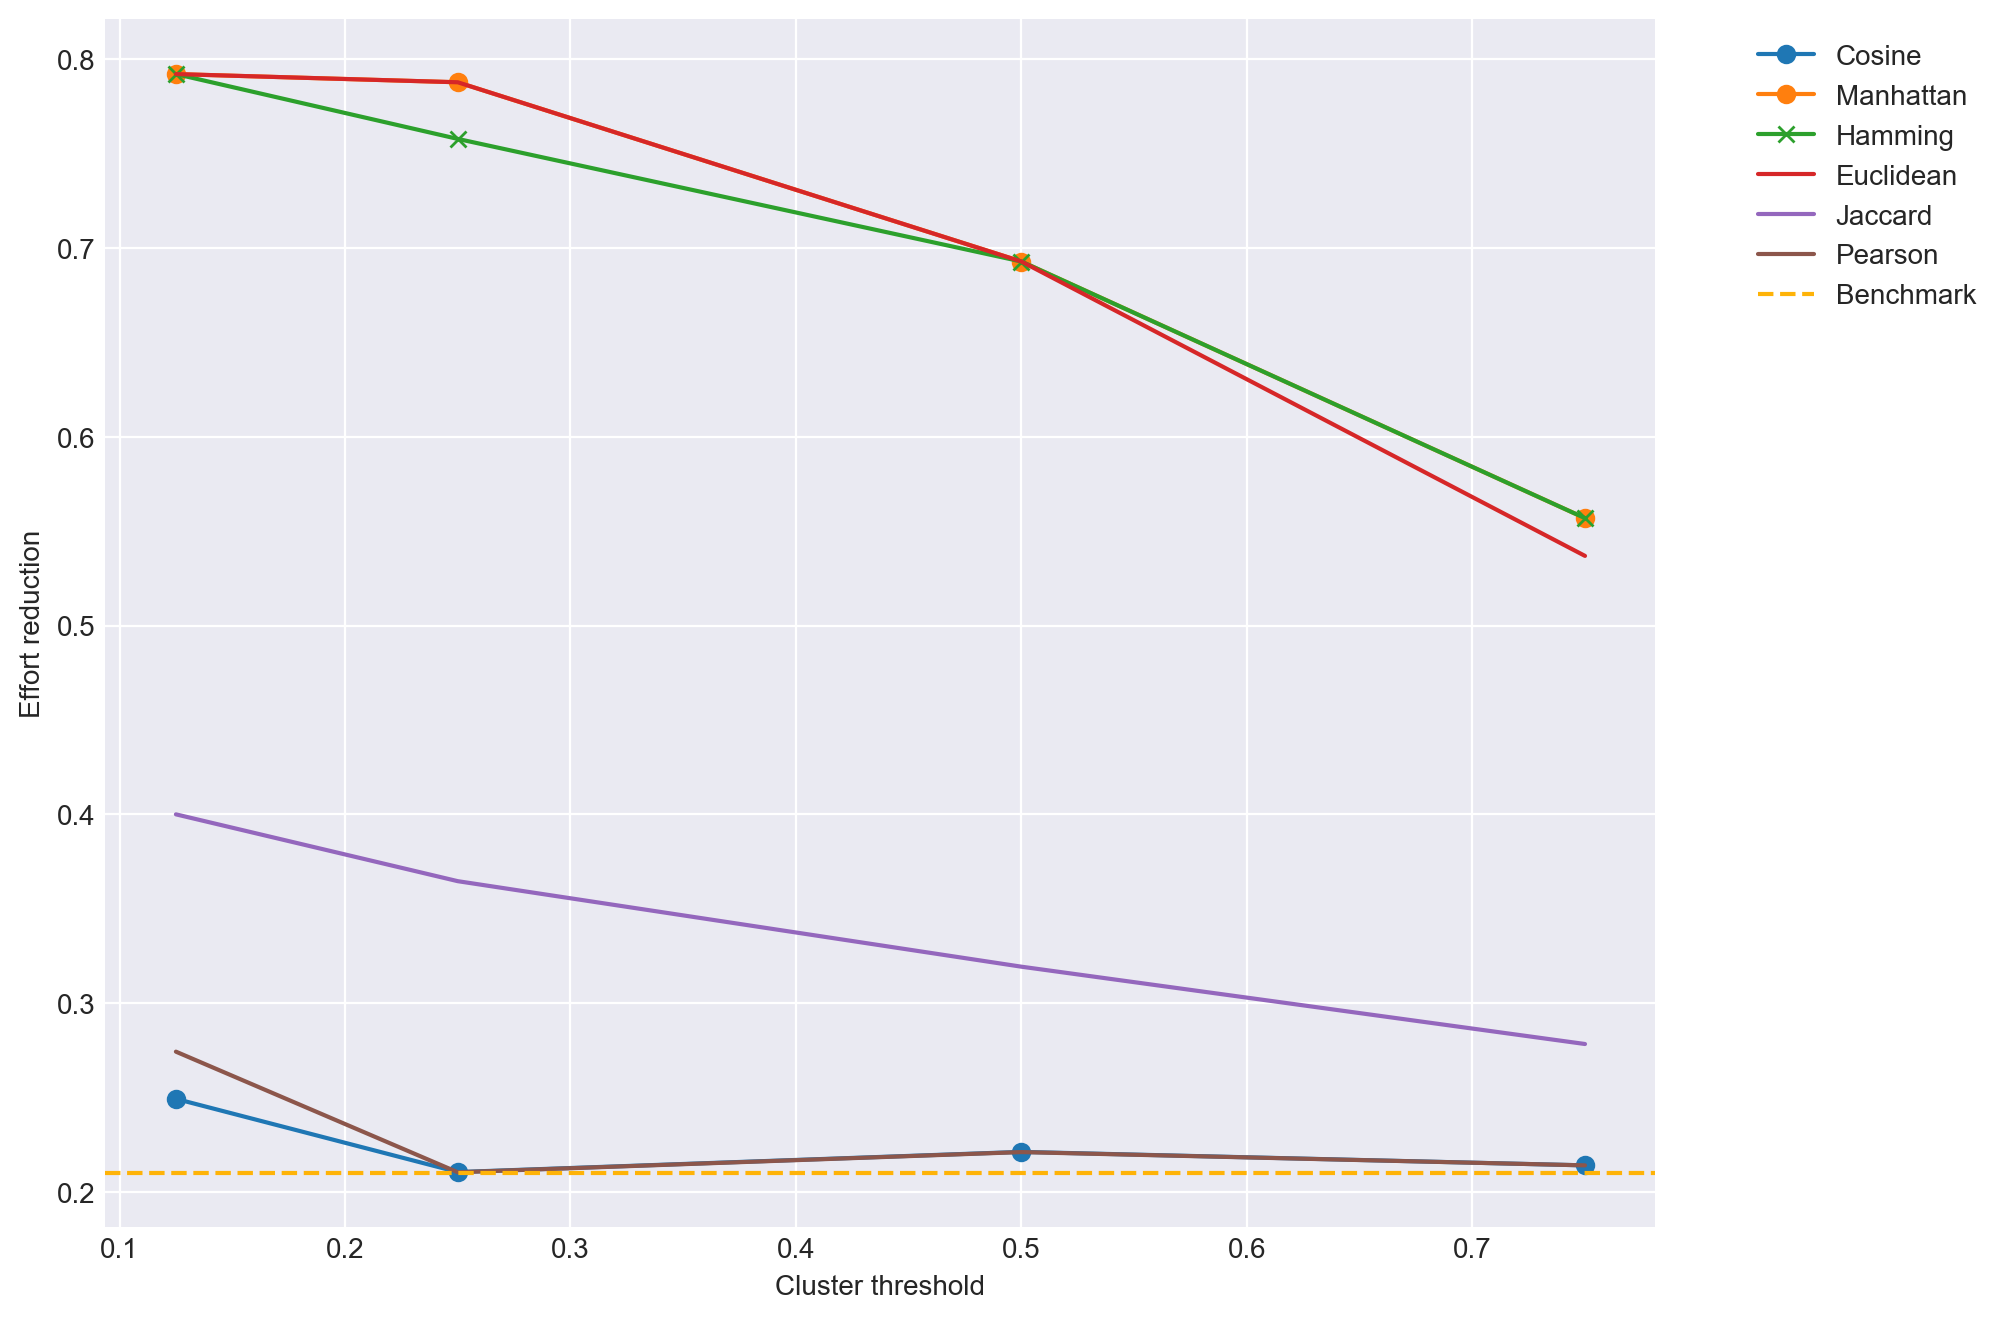

In [48]:
final_filter = [0.125, 0.25, 0.50, 0.75]
cosine_effort = [item[0] for item in effort_reduction]

manhattan_effort = [item[1] for item in effort_reduction]
hamming_effort = [item[2] for item in effort_reduction]
euclidean_effort = [item[3] for item in effort_reduction]
jaccard_effort = [item[4] for item in effort_reduction]
pearson_effort = [item[5] for item in effort_reduction]
plt.figure(figsize=(10,8), dpi=200)
sns.set_style("darkgrid")
plt.plot(final_filter,cosine_effort, label="Cosine",marker="o")
plt.plot(final_filter,manhattan_effort, label="Manhattan",marker ="o")
plt.plot(final_filter,hamming_effort, label="Hamming",marker="x")
plt.plot(final_filter,euclidean_effort, label="Euclidean")
plt.plot(final_filter,jaccard_effort, label="Jaccard")
plt.plot(final_filter,pearson_effort, label="Pearson")
plt.axhline(y=benchmark_reduction, color = sns.xkcd_rgb["amber"], linestyle='--', label="Benchmark")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylabel('Effort reduction')
plt.xlabel('Cluster threshold')

In [11]:
import json
distance_nested_list = []
distance_metric=["cosine","cityblock","hamming","euclidean","jaccard","correlation"]
for metric in distance_metric:
    with open("input/"+"min_distance_"+ metric +"_clustering") as input:
        distance_nested_list.append(json.load(input))


In [110]:
percentile_list = [25, 50, 75, 87.5]
def find_percentile(one_list, percentage):
    temp_list = [item for item in one_list if item >0]
    return np.percentile(temp_list, percentage)
find_percentile(distance_nested_list[0],82.5)

0.6931684848189194

/Users/keya/anaconda3/envs/ML/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


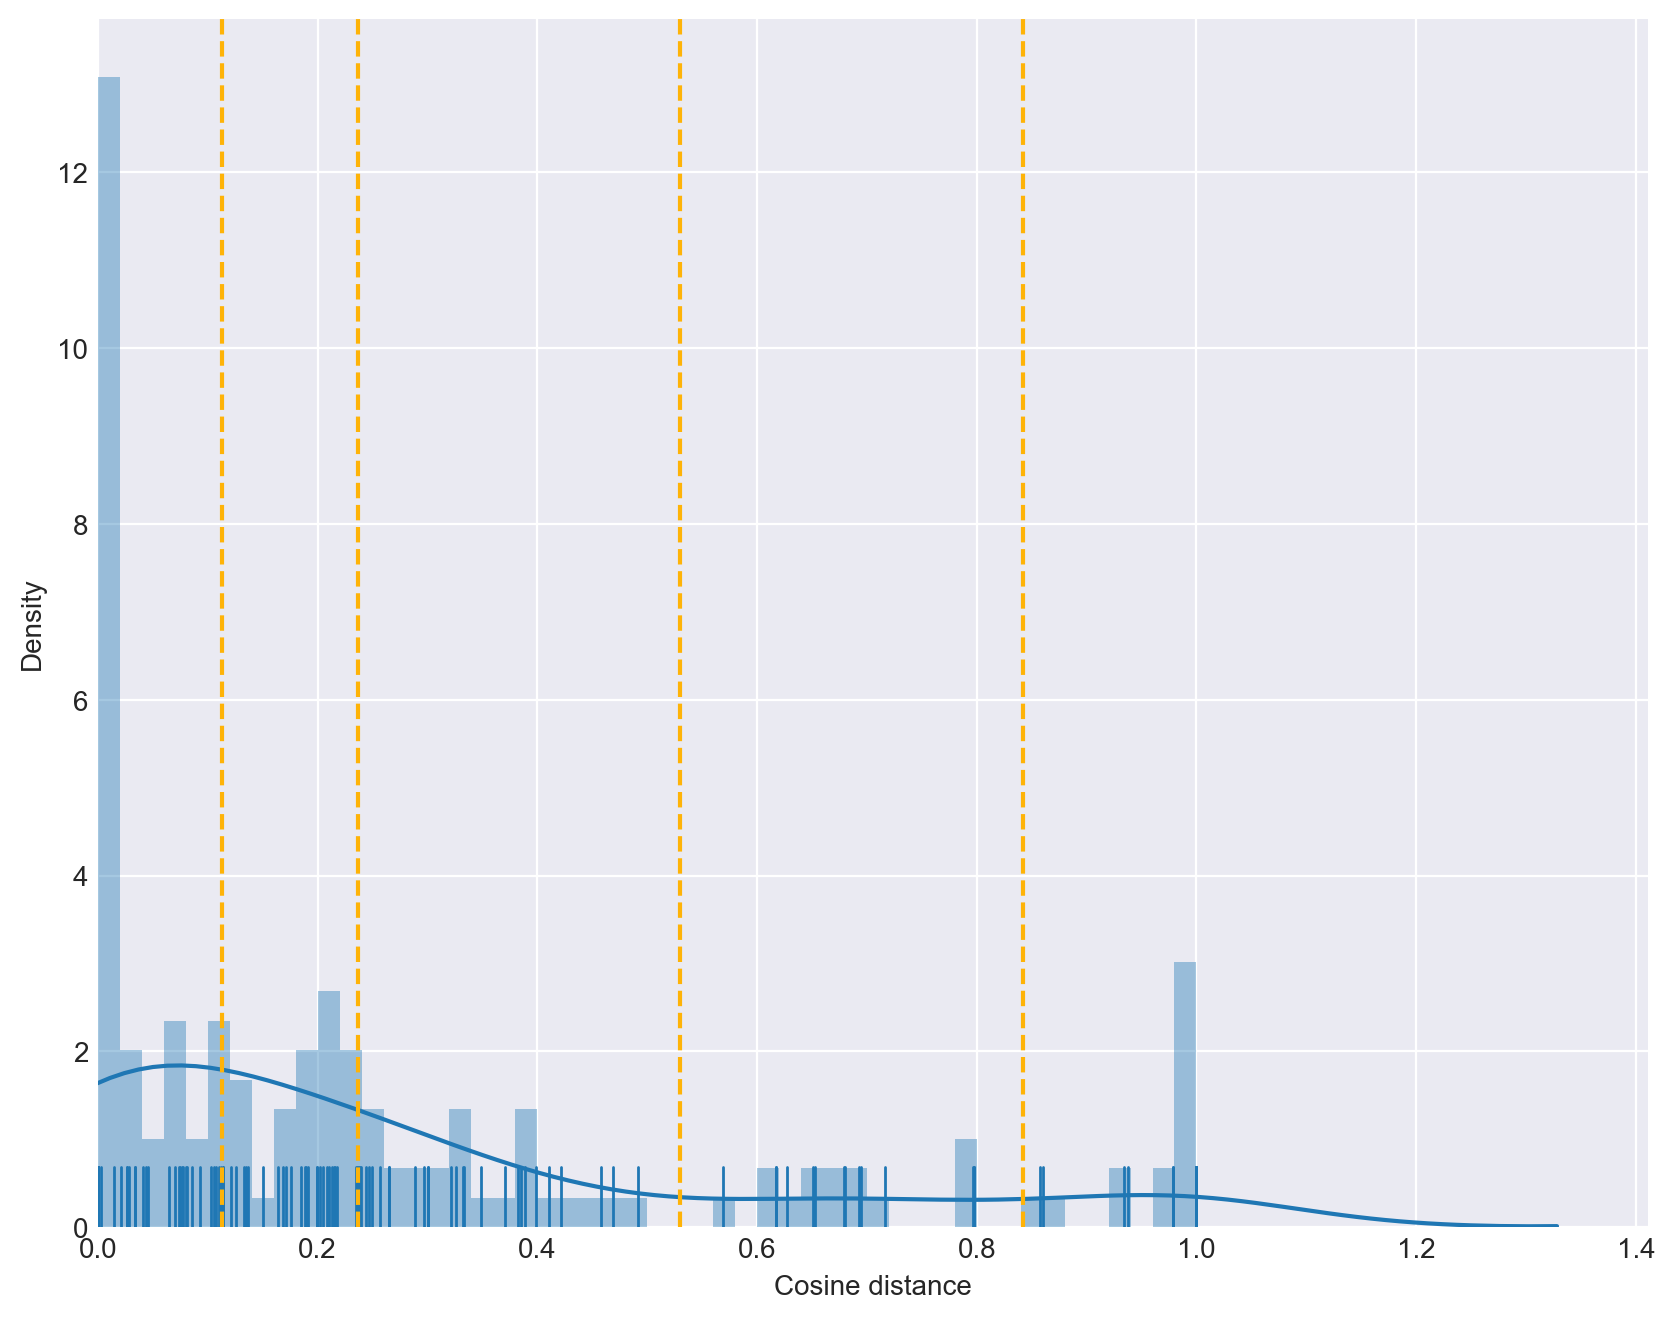

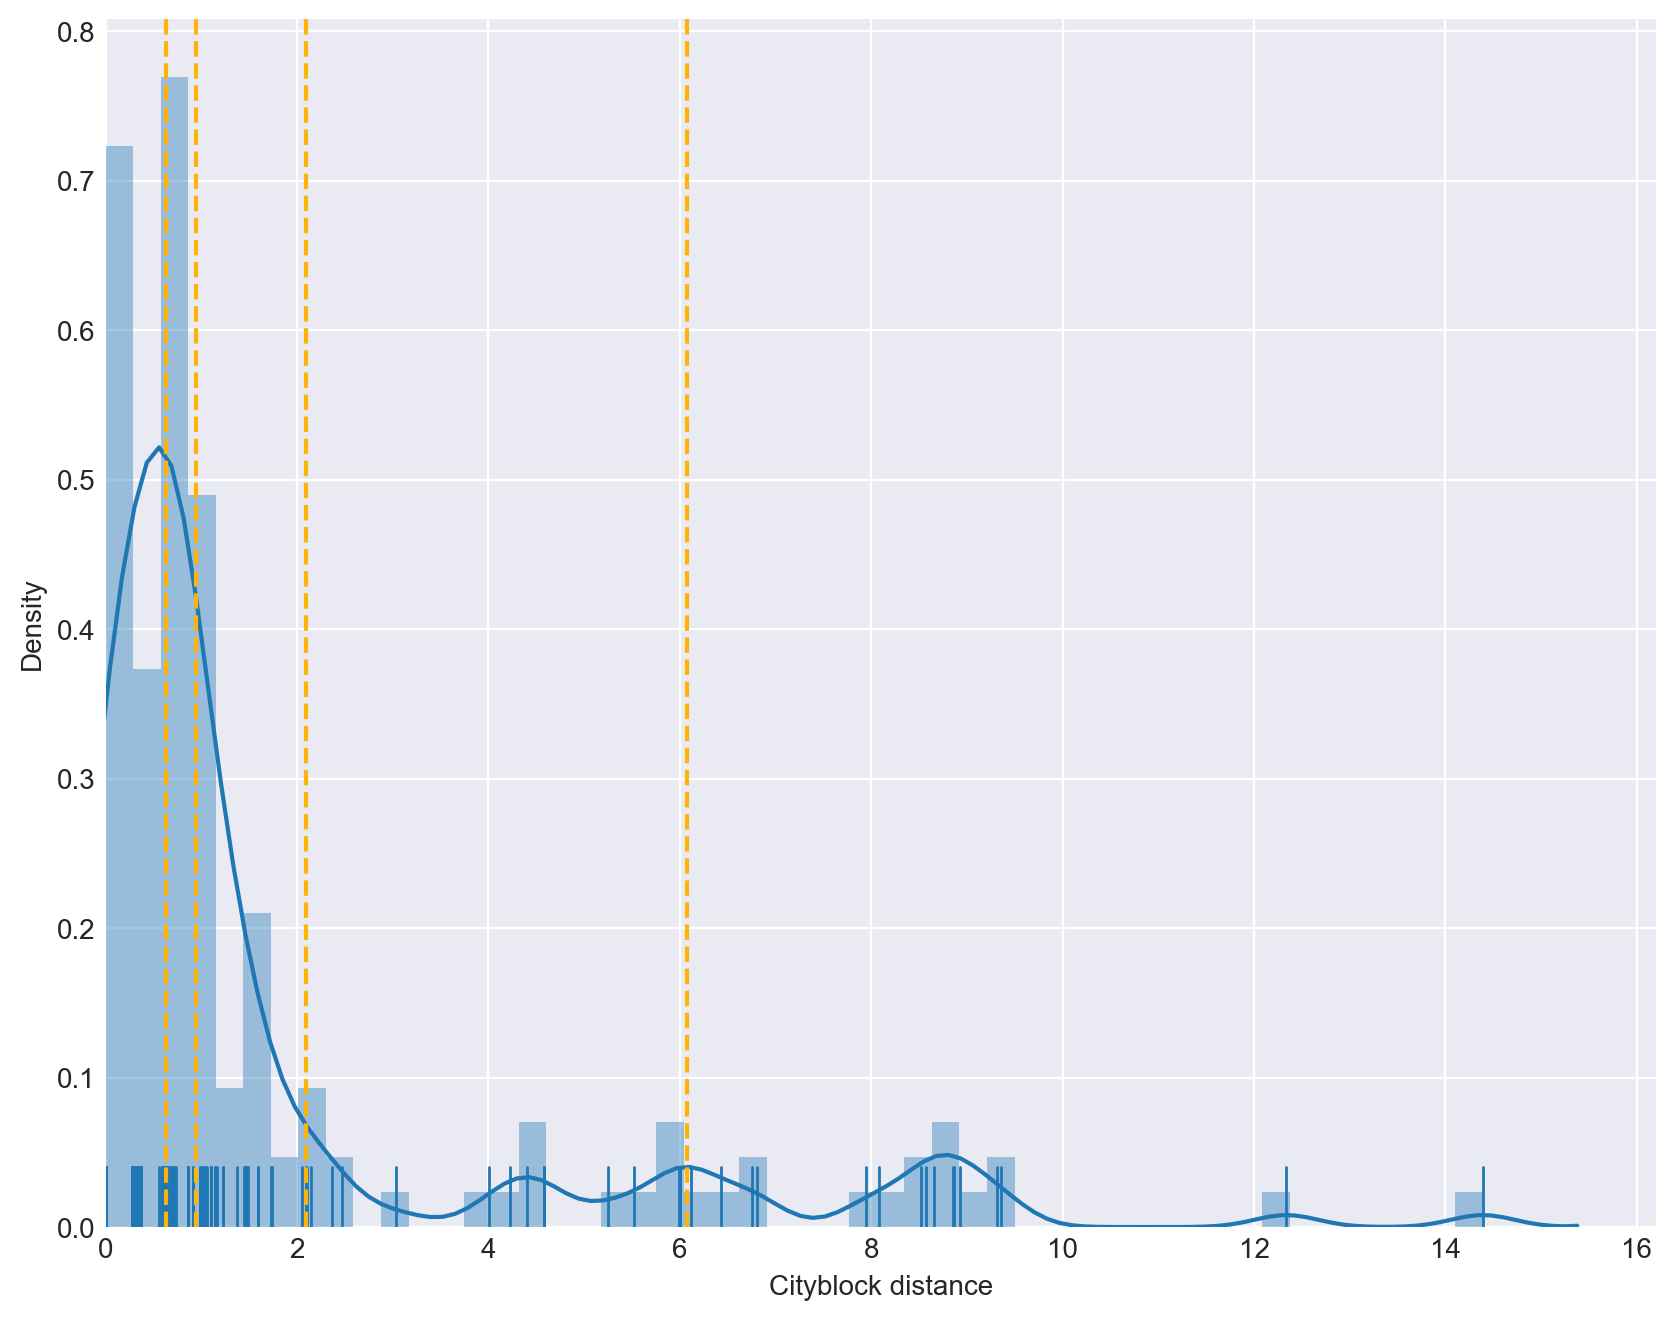

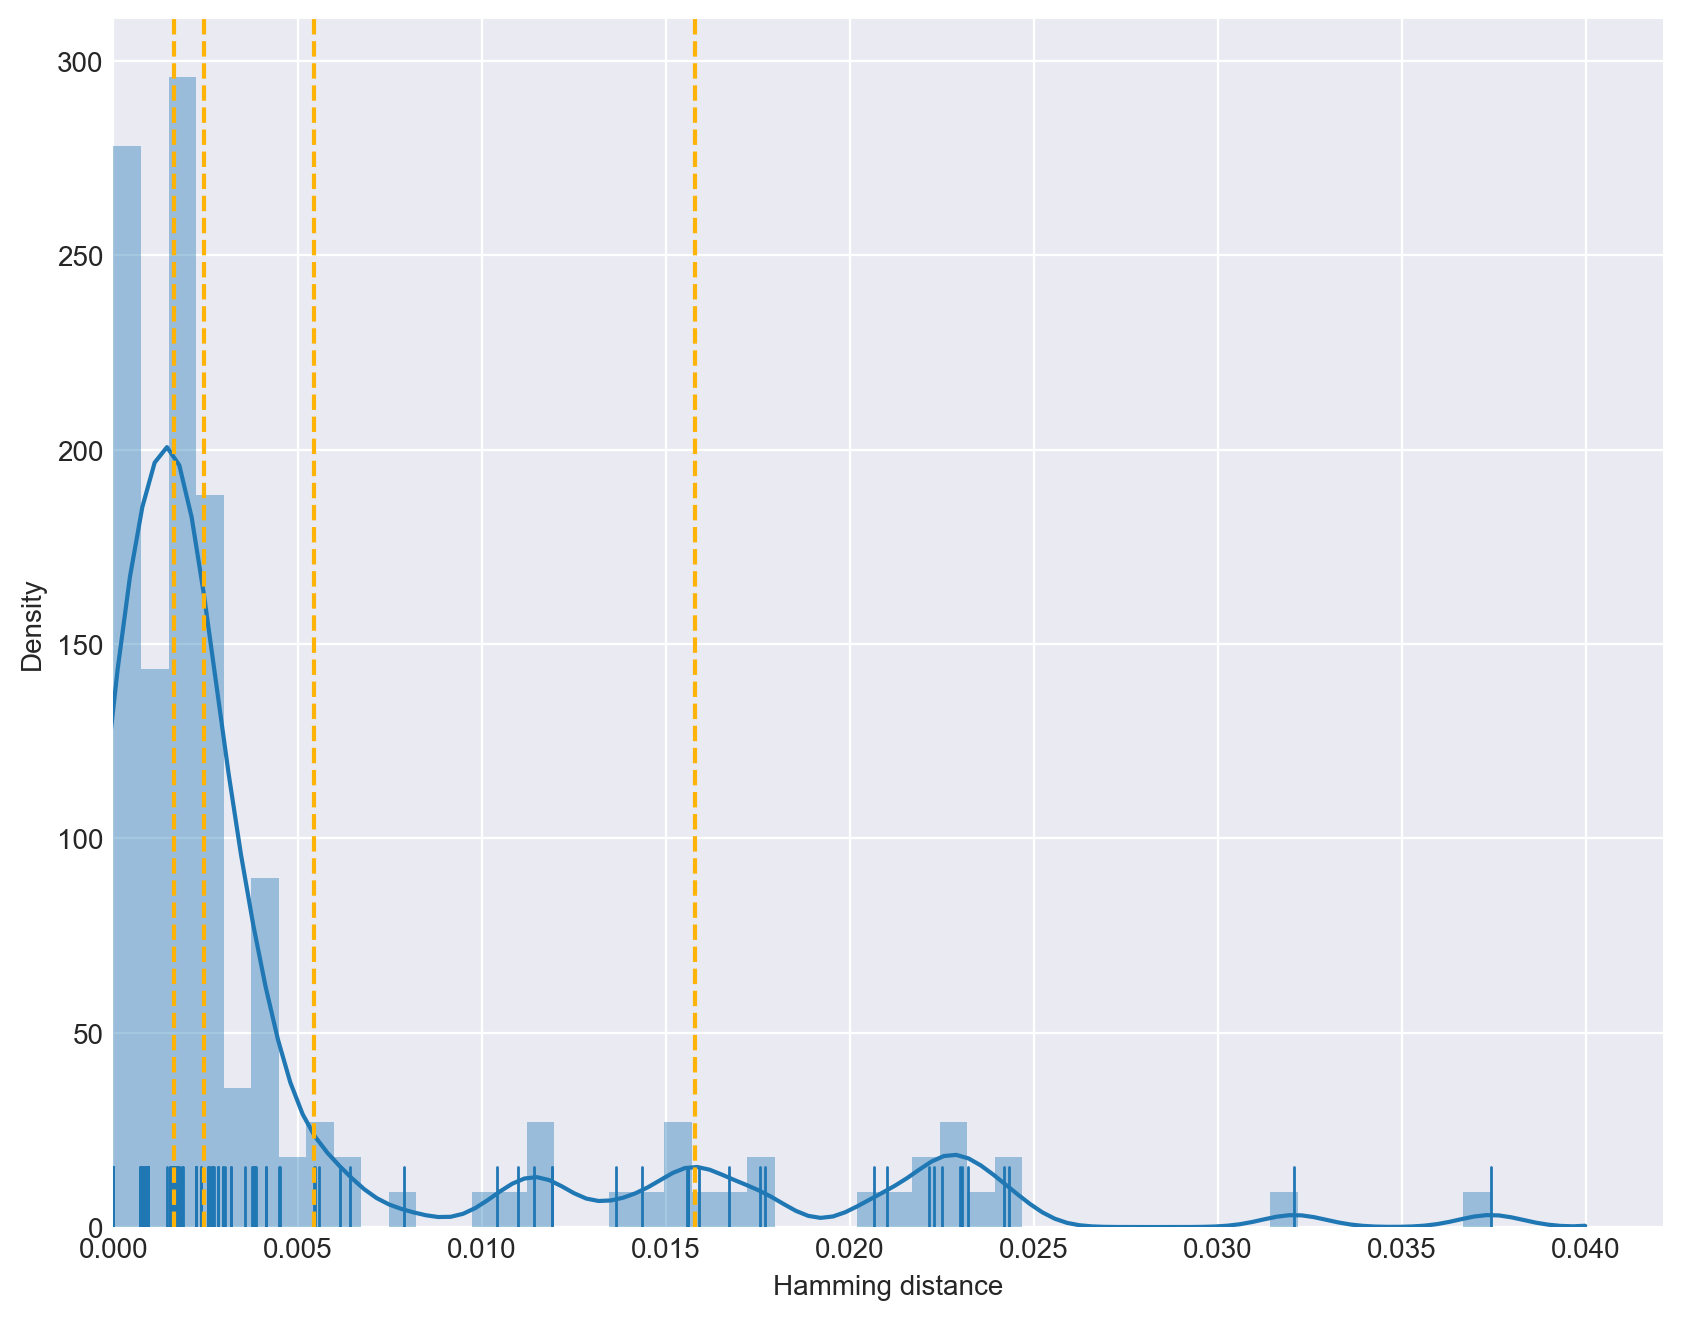

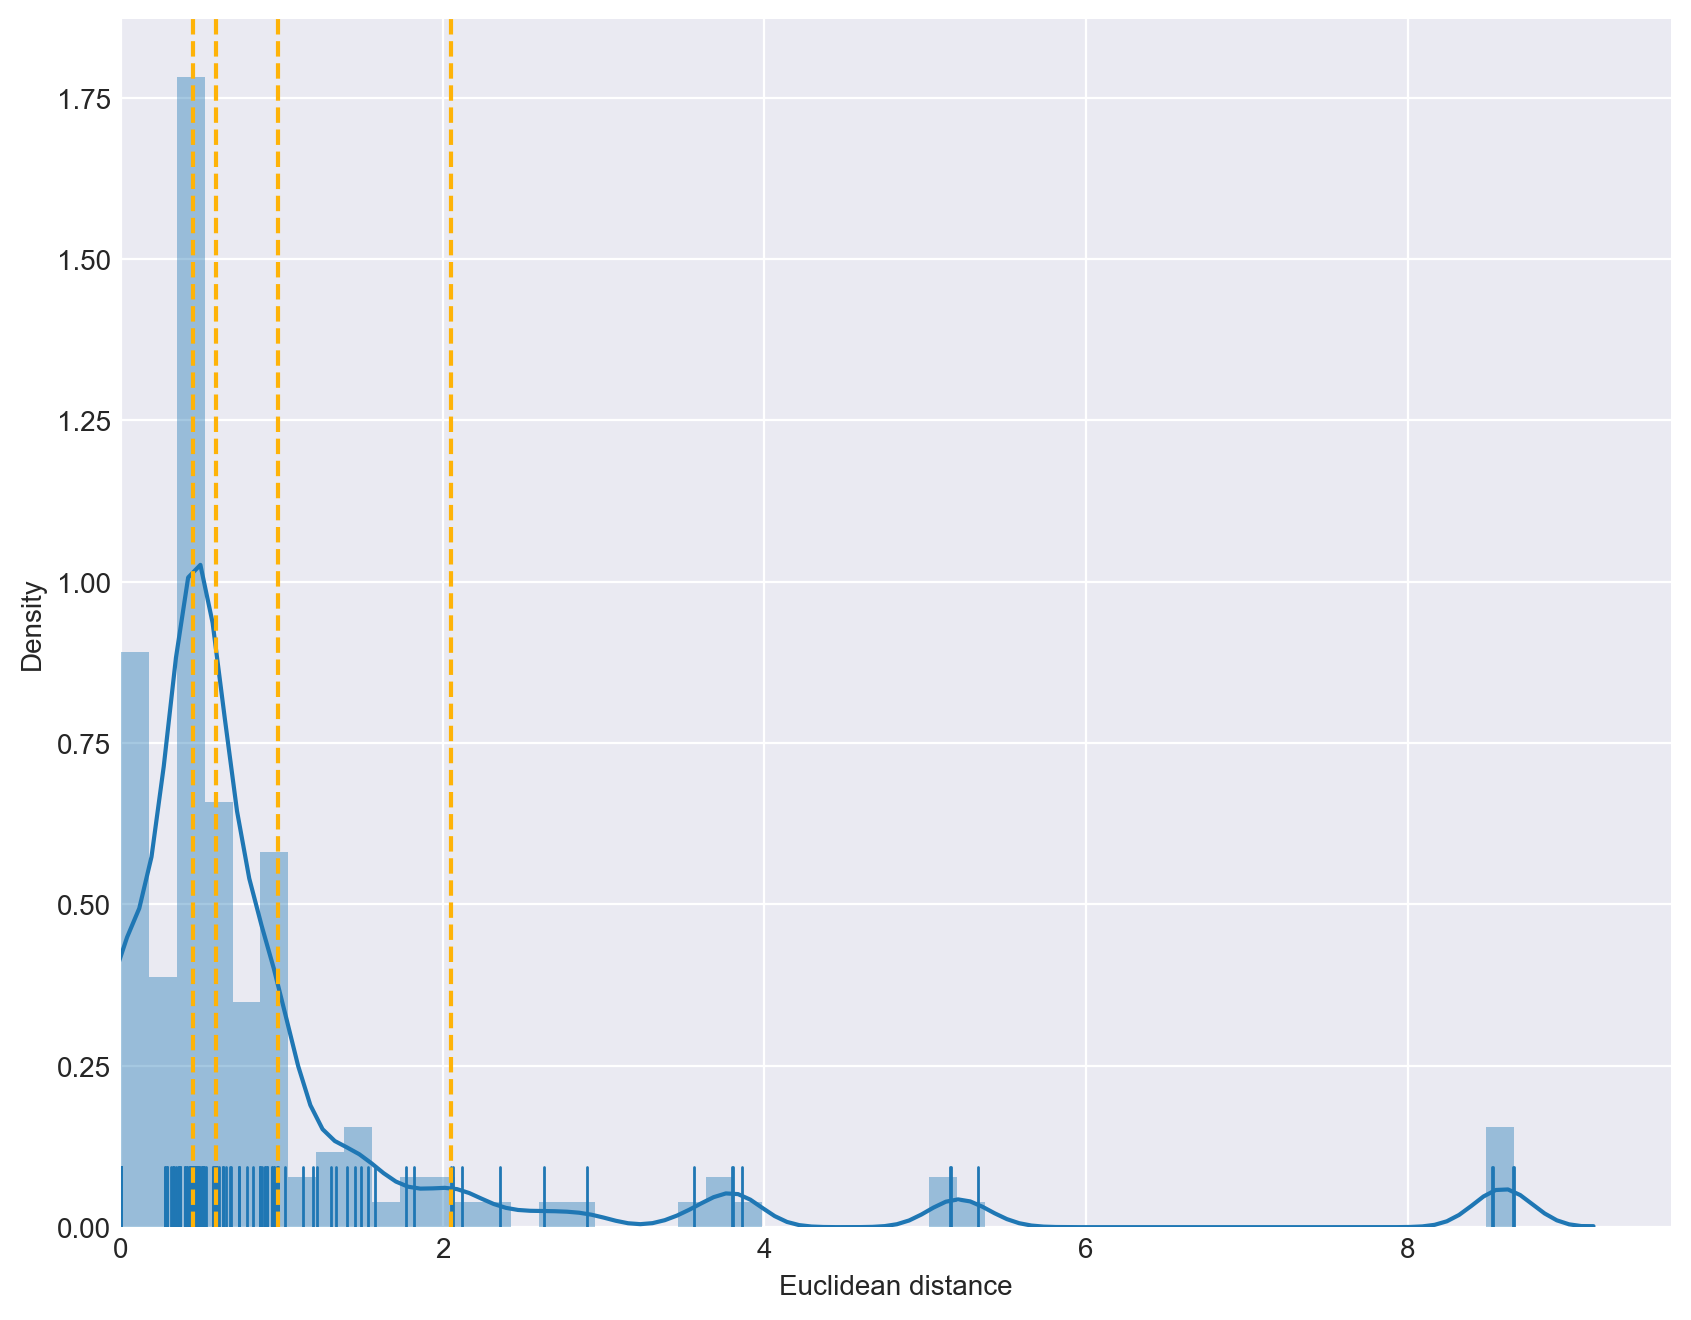

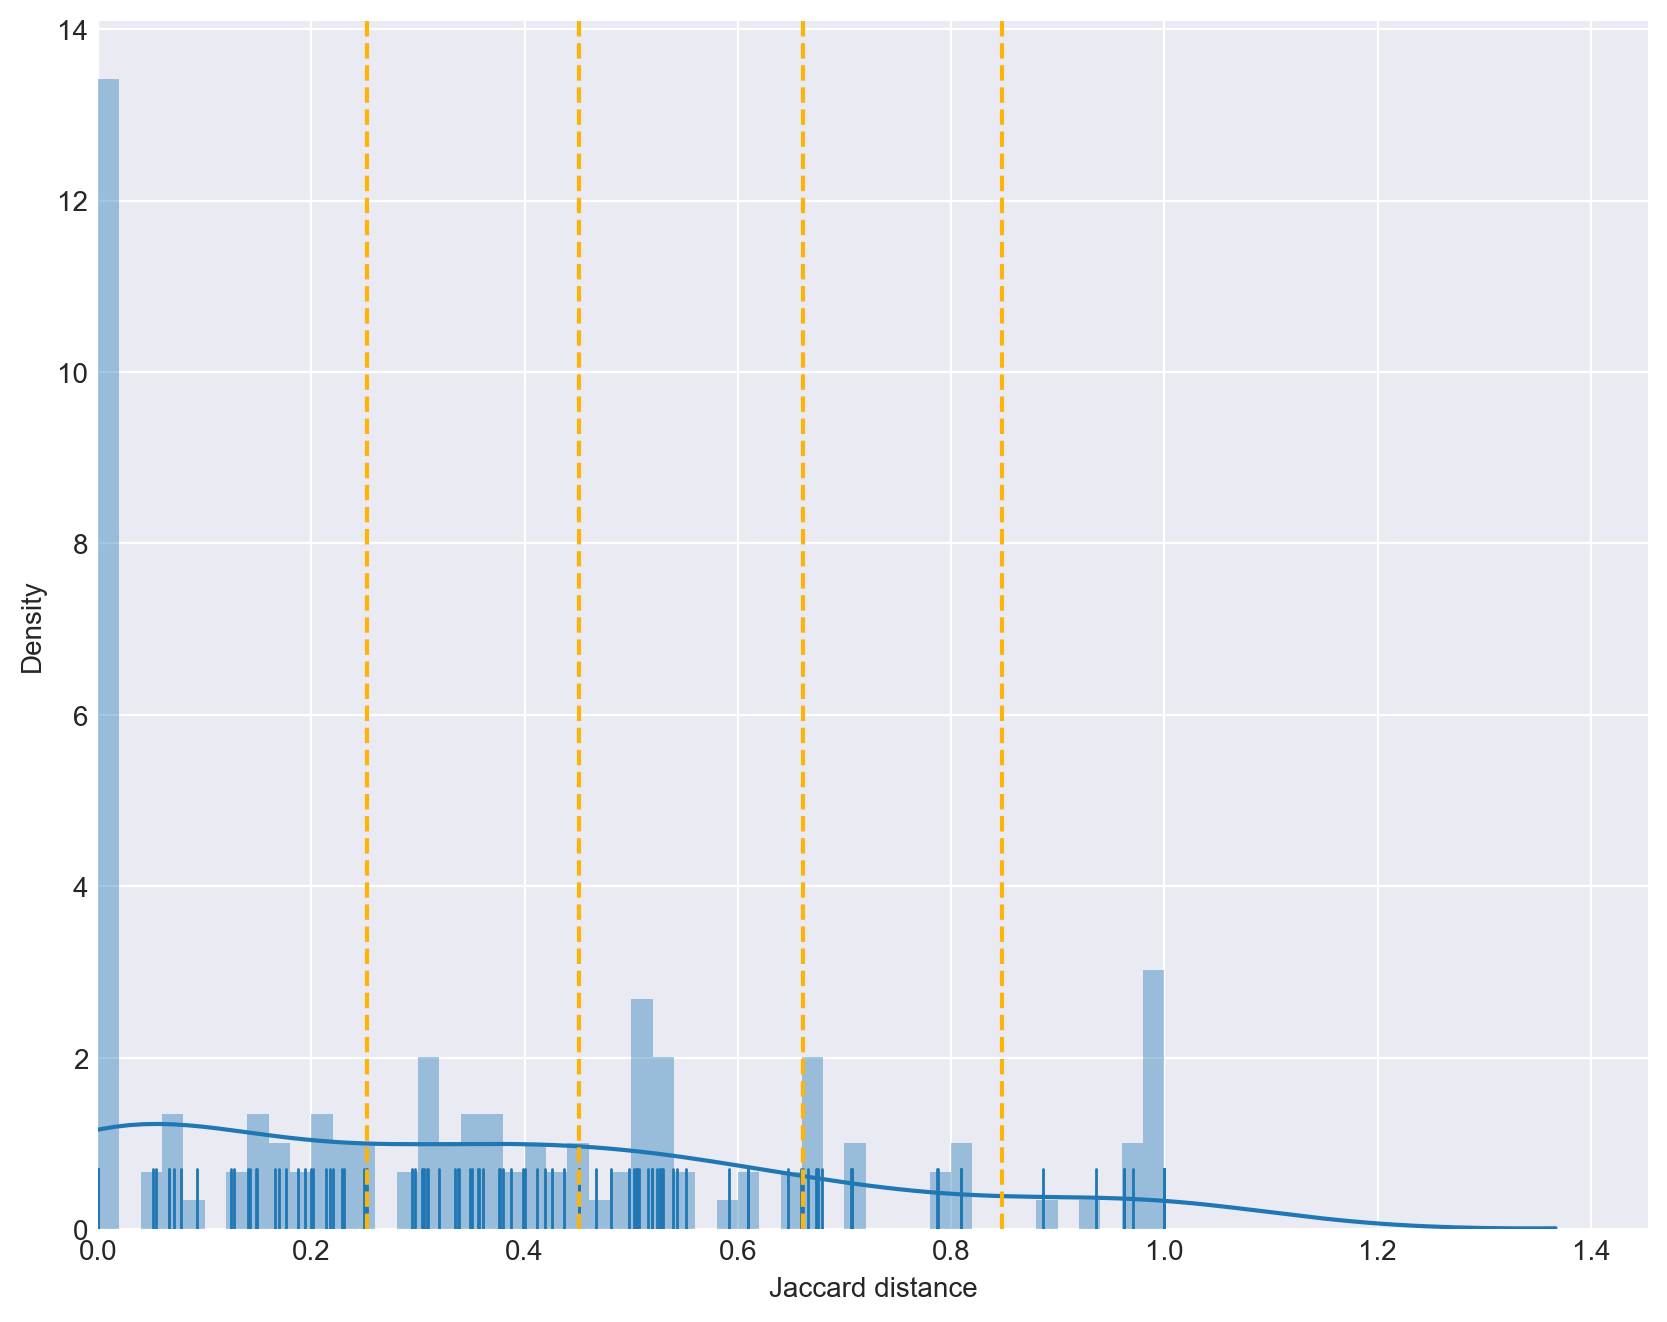

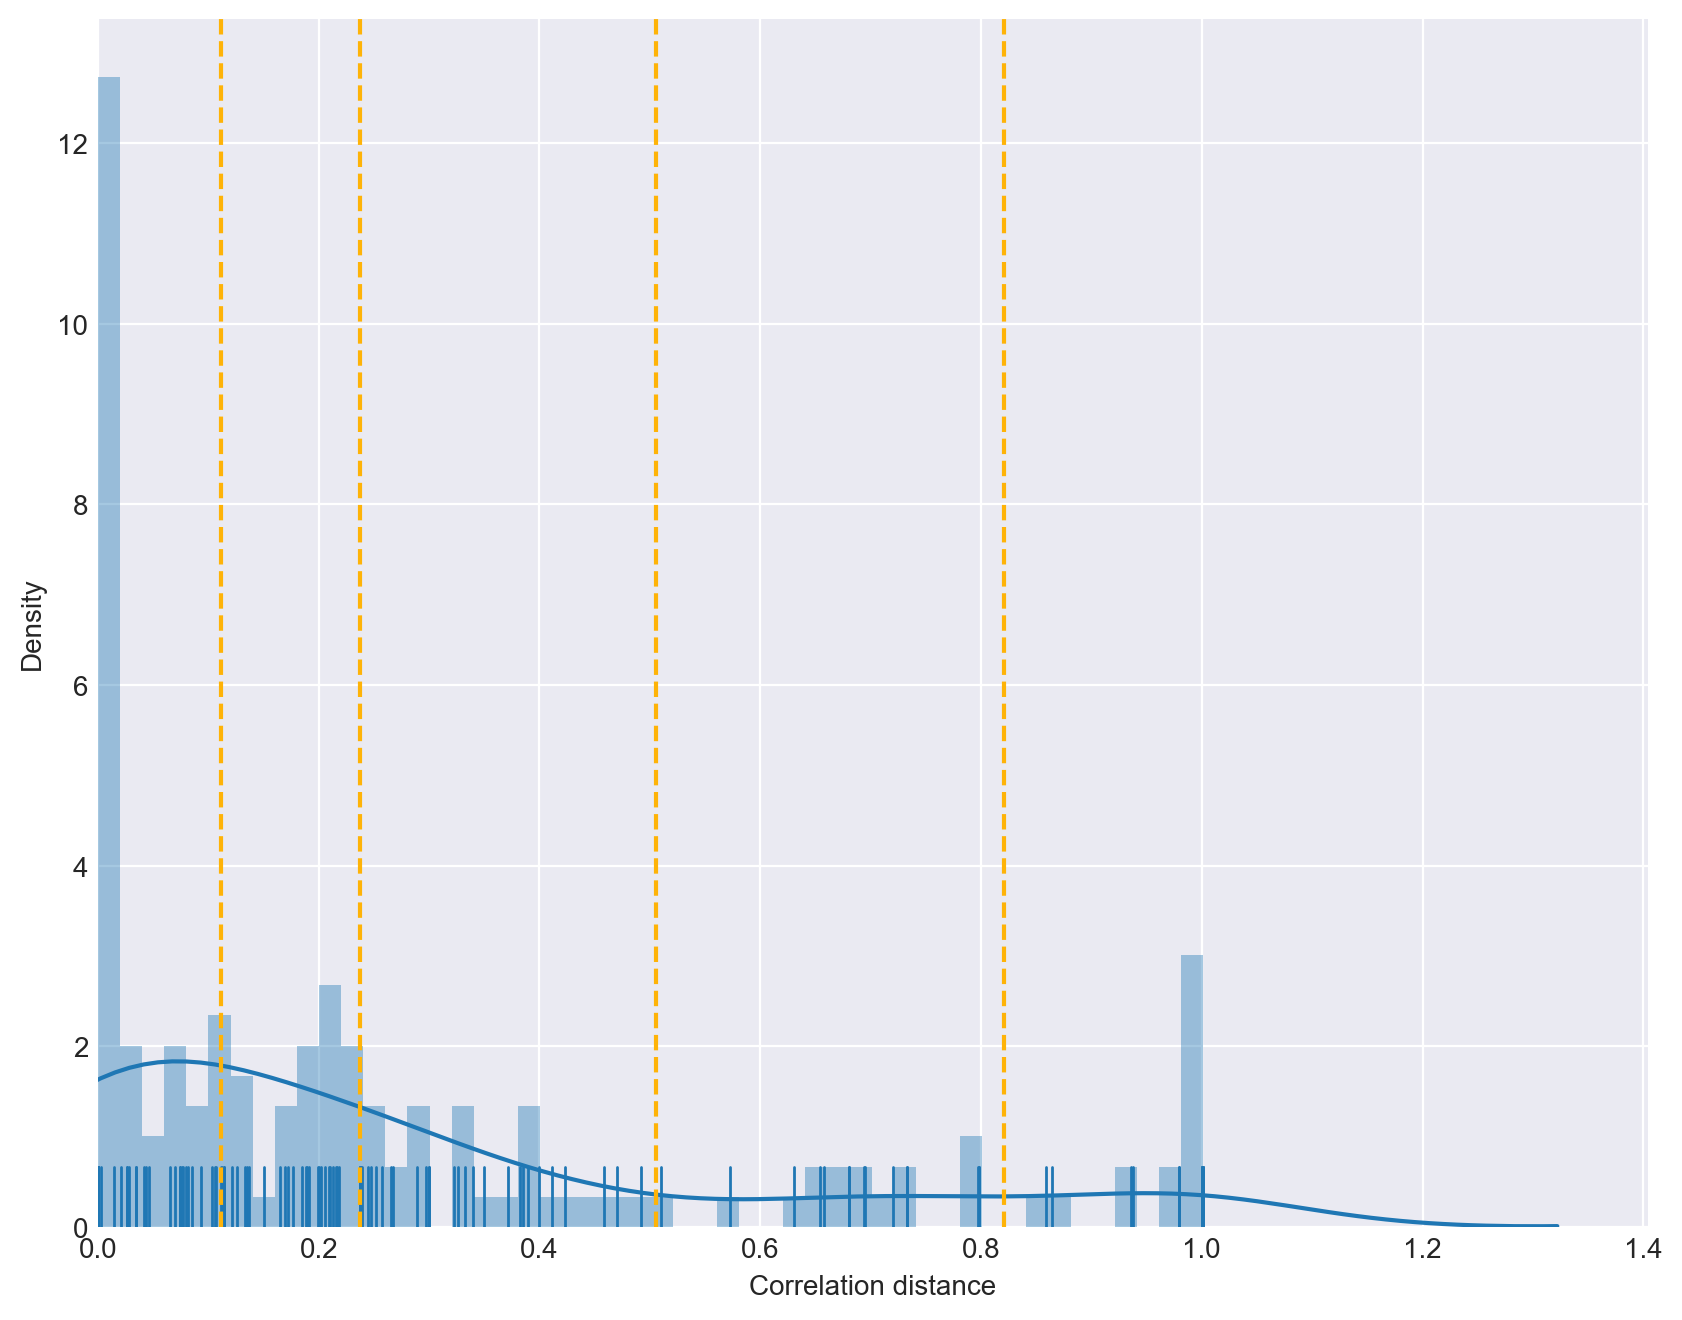

In [111]:
# index__ = 0
for index__ in range(0,len(distance_metric)):
    metric = distance_metric[index__]
    plt.figure(figsize=(10,8), dpi=200)
    our_distance__ = distance_nested_list[index__]
    binwidth= (max(our_distance__) - min(our_distance__))/50
    lm = sns.distplot(distance_nested_list[index__],bins=np.arange(min(our_distance__),max(our_distance__)+binwidth,binwidth),
                      norm_hist=True, kde=True, rug=True)
    for percentile__ in percentile_list:
        x_line__ = find_percentile(distance_nested_list[index__], percentile__)
        plt.axvline(x=x_line__, color = sns.xkcd_rgb["amber"], linestyle='--')
    axes = lm.axes
    plt.xlabel(metric.title() +" distance")
    plt.ylabel("Density")
    axes.set_xlim(0)
    plt.savefig("output/" +metric.title() +"_distance.png")

In [88]:
data_cluster_threshold=\
[[[0.3214285714,
0.2715108676,
0.2715108676,
0.2715108676,
0.4432539683,
0.3266369048,]
,
[0.5625,
0.3295454545,
0.3295454545,
0.3295454545,
0.6571428571,
0.6875,]
,
[0.2,
0.1773809524,
0.1773809524,
0.2851128472,
0.3485714286,
0.08452380952,]
,
[0.25,
0.4125,
0.421875,
0.546875,
0.6,
0.375,]],

[[
0.2380953333,
0.272320125,
0.274024625,
0.274024625,
0.30950175,
0.3392858095,]
,
[
0.5625,
0.3327375,
0.39205,
0.338425,
0.5625041667,
0.6875,]
,
[
0.116675,
0.179301625,
0.186301625,
0.2879325,
0.2178571425,
0.09702380917,]
,
[
0.375,
0.46425,
0.375,
0.5535,
0.375,
0.5,]],


[[0.3464285714,
0.2986011905,
0.2986011905,
0.3111011905,
0.3267733135,
0.3642857143,]
,
[0.5625,
0.39375,
0.39375,
0.51875,
0.5669642857,
0.6875,]
,
[0.2208333333,
0.1843353175,
0.1843353175,
0.3059325397,
0.2178571429,
0.1,]
,
[0.375,
0.45,
0.45,
0.6,
0.375,
0.5,]],


[[0.3678571429,
0.2947089947,
0.2947089947,
0.306712963,
0.362962963,
0.3834821429,]
,
[0.75,
0.5138888889,
0.5138888889,
0.6388888889,
0.7083333333,
0.875,]
,
[0.2208333333,
0.1867063492,
0.1898313492,
0.2973710317,
0.2178571429,
0.103125,]
,
[0.375,
0.5,
0.5,
0.625,
0.375,
0.5,]]]
Benchmark_MAP_weight = 0.41785725
Benchmark_MAP_distance = 0.241675
Benchmark_recall_weight = 0.75
Benchmark_recall_distance = 0.5
MAP_weight = [item[0] for item in data_cluster_threshold]
Recall_weight = [item[1] for item in data_cluster_threshold]
MAP_distance = [item[2] for item in data_cluster_threshold]
Recall_distance = [item[3] for item in data_cluster_threshold]
distance_metric__=["cosine","manhattan","hamming","euclidean","jaccard","pearson"]
ignore_distance_set={"manhattan","hamming","euclidean"}
cluster_threshold = [0.125, 0.25, 0.50, 0.75]
sns_six_color = ["windows blue","dark navy","dark yellow","red","dusty purple","faded green"]
sns_benchmark = ["amber"]
# sns.xkcd_rgb["amber"]

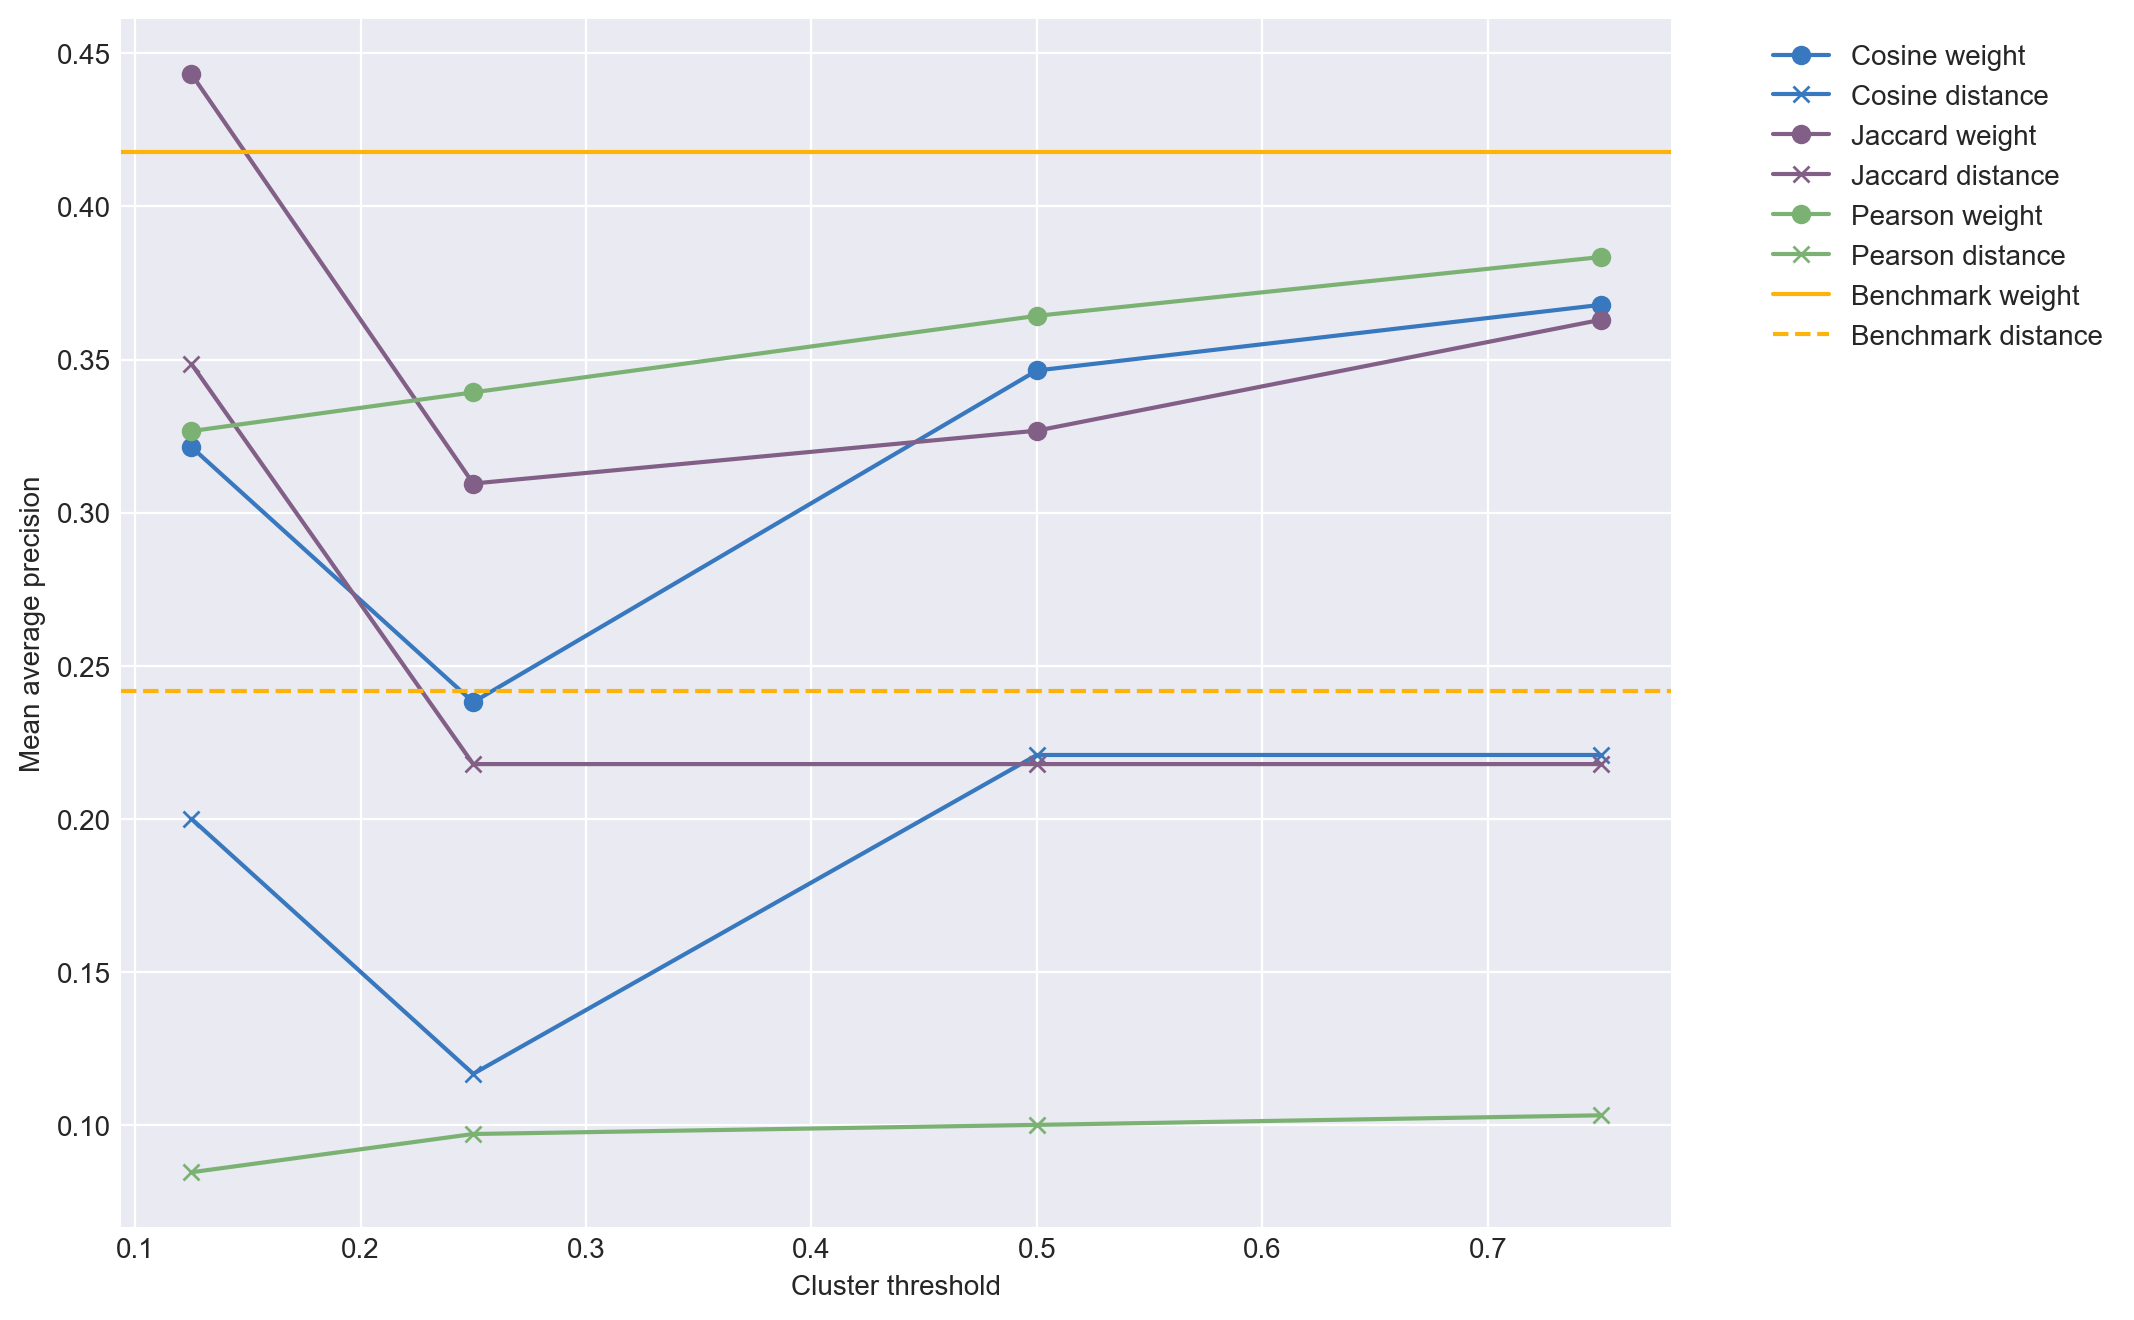

In [93]:
plt.figure(figsize=(10,8), dpi=200)
for index in range(0,len(distance_metric__)):
    if distance_metric__[index] in ignore_distance_set:
        continue
    temp_MAP_weight = [item[index] for item in MAP_weight]
    temp_MAP_distance = [item[index] for item in MAP_distance]
    plt.plot(final_filter, temp_MAP_weight,color=sns.xkcd_rgb[sns_six_color[index]], marker="o", label=distance_metric__[index].title()+" weight")
    plt.plot(final_filter, temp_MAP_distance,color=sns.xkcd_rgb[sns_six_color[index]],marker="x", label=distance_metric__[index].title()+" distance")

plt.axhline(y=Benchmark_MAP_weight, color = sns.xkcd_rgb["amber"], linestyle='-', label="Benchmark weight")
plt.axhline(y=Benchmark_MAP_distance, color = sns.xkcd_rgb["amber"], linestyle='--', label="Benchmark distance")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylabel('Mean average precision')
plt.xlabel('Cluster threshold')
plt.savefig("output/MAP_cluster_threshold.png")
# manhattan_MAP_weight = [item[1] for item in MAP_weight]
# hamming_MAP_weight = [item[2] for item in MAP_weight]
# euclidean_weight = [item[3] for item in MAP_weight]
# jaccard_weight = [item[4] for item in MAP_weight]
# pearson_weight = [item[5] for item in MAP_weight]

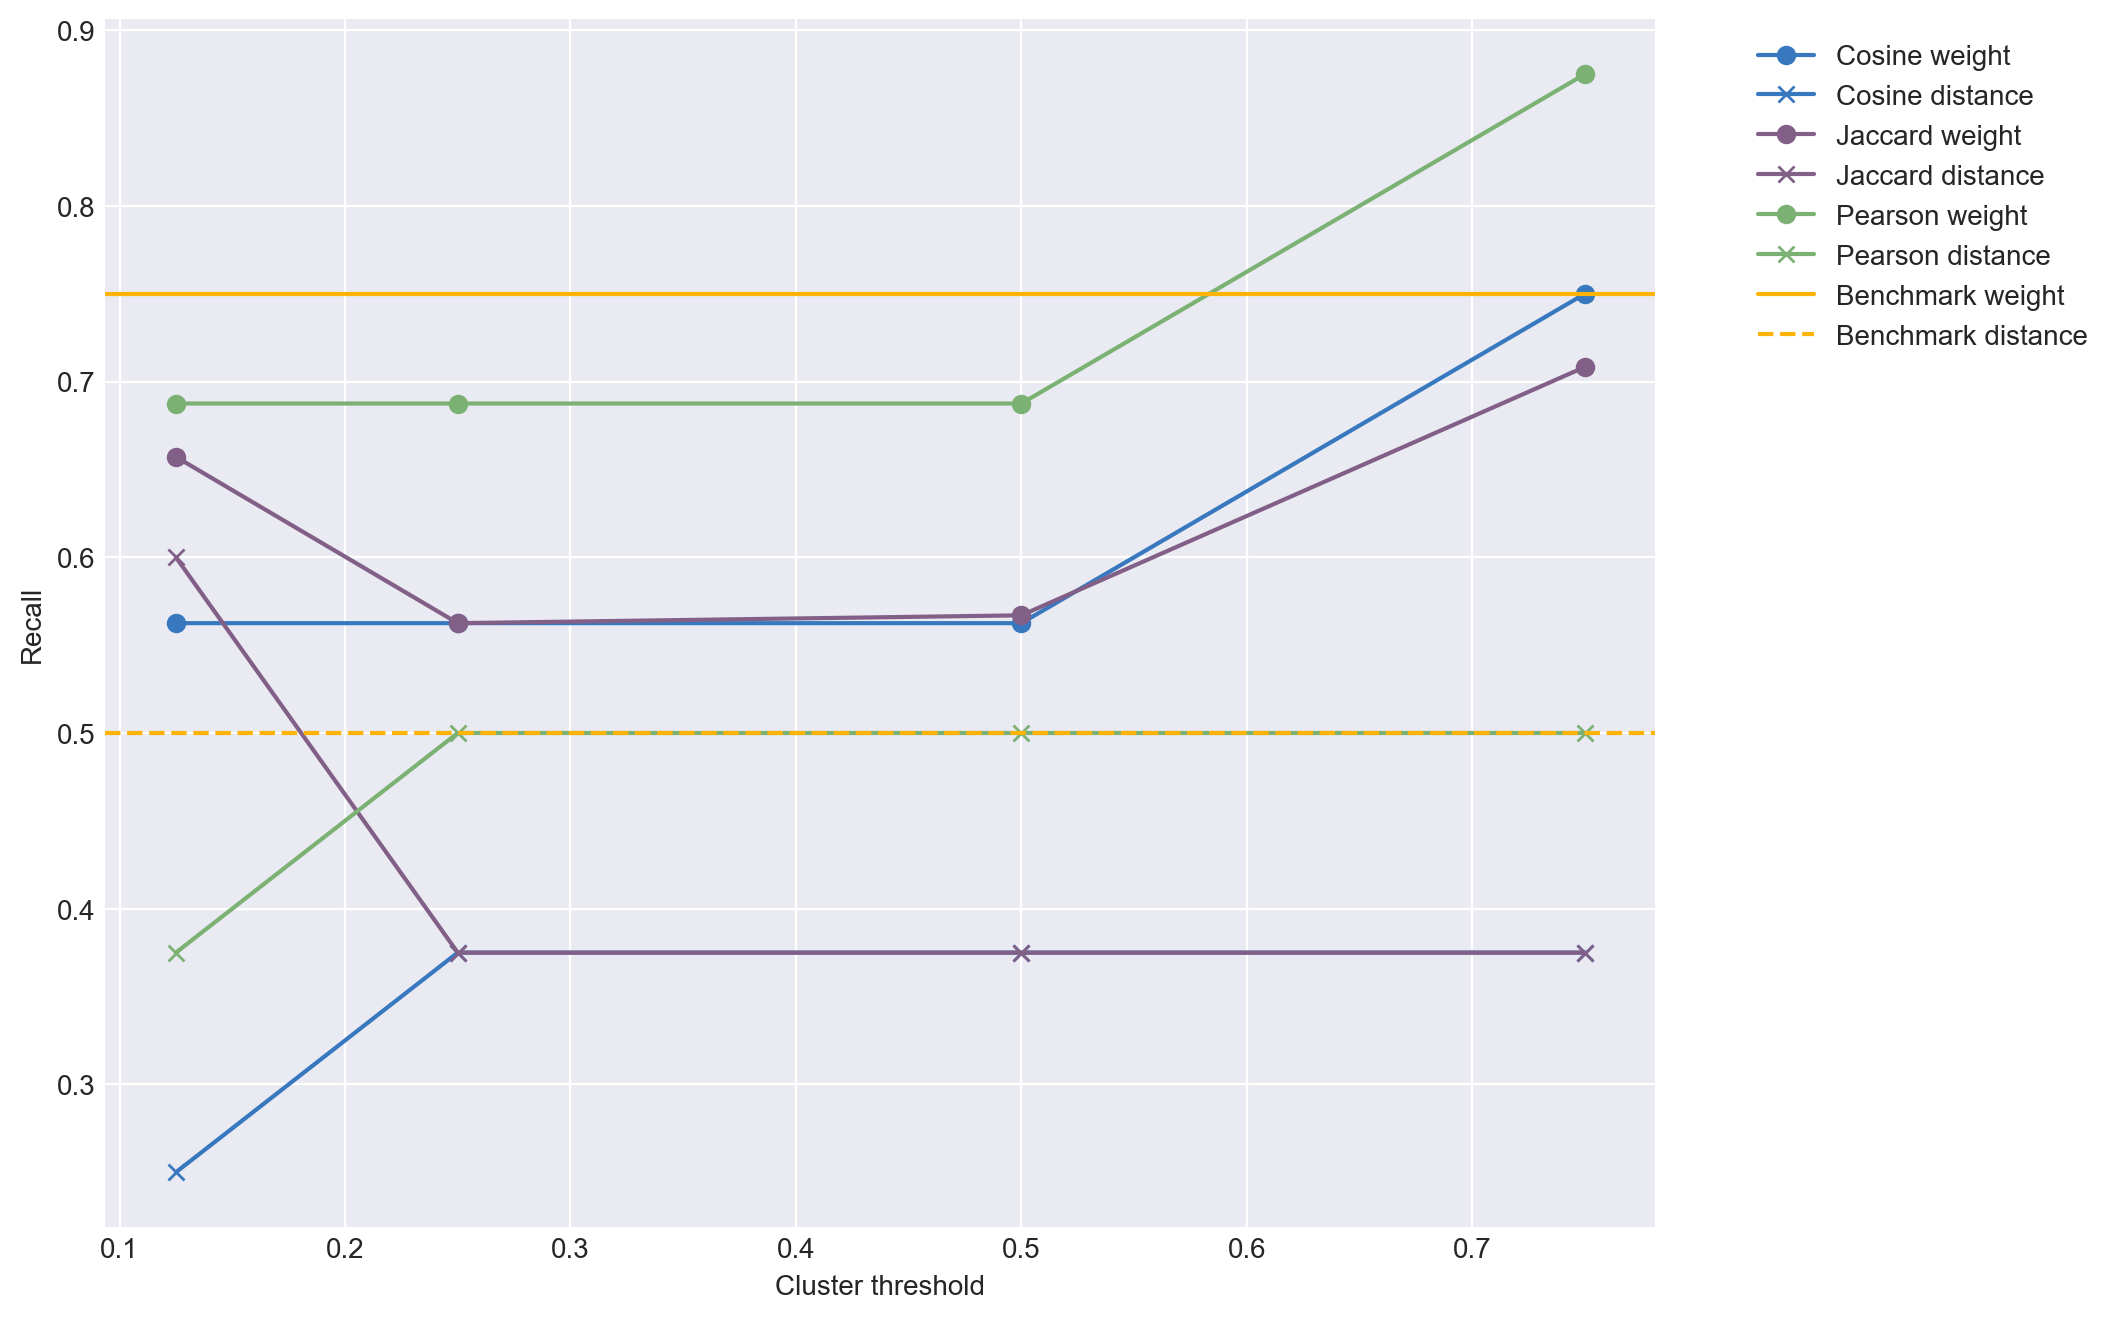

In [94]:
plt.figure(figsize=(10,8), dpi=200)
for index in range(0,len(distance_metric__)):
    if distance_metric__[index] in ignore_distance_set:
        continue
    temp_recall_weight = [item[index] for item in Recall_weight]
    temp_recall_distance = [item[index] for item in Recall_distance]
    plt.plot(final_filter, temp_recall_weight,color=sns.xkcd_rgb[sns_six_color[index]], marker="o", label=distance_metric__[index].title()+" weight")
    plt.plot(final_filter, temp_recall_distance,color=sns.xkcd_rgb[sns_six_color[index]],marker="x", label=distance_metric__[index].title()+" distance")

plt.axhline(y=Benchmark_recall_weight, color = sns.xkcd_rgb["amber"], linestyle='-', label="Benchmark weight")
plt.axhline(y=Benchmark_recall_distance, color = sns.xkcd_rgb["amber"], linestyle='--', label="Benchmark distance")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylabel('Recall')
plt.xlabel('Cluster threshold')
plt.savefig("output/Recall_cluster_threshold.png")